**WHAT IS THIS?**

An experiment on image classication using softmax regression

**SUMMARY OF RESULTS**

Successfully learned all the training data with 99 percent accuracy.

Given the configurations, the training took 10,000 iterations. 

Bad at classifying handwritten examples. 

**GOAL**

To classify a digit from 0 - 9

**IMPEMENTATION**

This uses the following update function
$$
\theta^{k + 1} = \theta^k + a\times X(Y - H(X))
$$
where $H(X)\exists\R^{k - 1 \times m}$ denotes the hypothesis per feature. We can calculate it through the following matrix transformations

$$
H(X) = \frac{1}{\sum_j^ke^{\theta_j x^T}} \times E
$$

And
$$
X \exists \R^{m \times d}
$$

such that m is the number of training data and d is the number of features. We can determine its classification using a one-hot vector

$$
Y \exist\R^{k\times m}
$$

Also k is the number of classifications, and the i’th entry in Y is the classification of the i’th classification in X denoted as a vector that is 0 everywhere except the k’th index that pertains to the classification of $x_i$. Example, if the classification of $x_i$ is 2, we expect a one hot vector as follows

$$
V_2 = [0, 0, 1, 0, 0,0]^T
$$

We can then denote the parameters per classification $\theta$ as 

$$
\theta\exists\R^{k\times d}
$$

where $\theta_i$ is the i’th parameter that produces the line that helps us gauge how close a data is to this classification.

**HYPOTHESIS**

To produce a hypothesis, we will use the following
$$
h(x) = 
\frac{1}{\sum_j^ke^{\theta_j x^T}}\times\begin{bmatrix}
e^{\theta_0 x^T} \\ 
e^{\theta_1 x^T} \\ 
e^{\theta_3 x^T} \\
\vdots \\
e^{\theta_{k} x^T}
\end{bmatrix}
$$  

which can easily be calculated using the following matrix tranformation
$$
\frac{1}{\sum_j^ke^{\theta_j x^T}} \times e^{\theta x^T}
$$

## STEP 1: Parse the images and create X, Y and $\theta$

In [103]:
import os
from PIL import Image
import tensorflow as tf
from IPython.display import display
import numpy as np

# Config accordingly
dataset_path = 'dataset/'
data_to_predict_path = 'to_predict/'
classifications = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

k = len(classifications)
s = 128                   # adjust according to dimensions of images
d = s*s                   # expected number of features. try to ensure that it's a square number
f = 100000                # factor to divide H to avoid getting large or very small outputs

initialize_x_y = False    # turn to on if you want to refresh the dataset
initialize_theta = False  # turn to on if you want to reset theta

# Values to be computed
m = 0                     # number of dataset
all_features = []         # i'th index represents the features of the i'th image
all_classifications = []  # i'th index represents the one-hot classification of the i'th image

# Function to load, resize, and preprocess an image
def load_and_preprocess_image(image_path, target_size=(s, s)):
    print("Processing image: " + image_path)
    image = tf.io.read_file(image_path)                 # Read image file   
    image = tf.image.decode_image(image, channels=1)    # Decode image to 3D tensor (height, width, channels)
    image = tf.image.resize(image, target_size)         # Resize image
    image = tf.reshape(image, (-1,))                    # Flatten image tensor to 1D tensor
    return image                                        # Returns a row vector of size d

# Process all images
def convert_all_images_to_tensors():
    for i in range(k):
        # Get the list of all image files in the folder
        image_folder_path = os.path.join(dataset_path, classifications[i])
        image_files = [os.path.join(image_folder_path, f) for f in os.listdir(image_folder_path) 
                       if os.path.isfile(os.path.join(image_folder_path, f))]
        
        print("Processing Folder: " + image_folder_path)
        for image_file in image_files:
            features = load_and_preprocess_image(image_file)
            all_features.append(features)
            all_classifications.append(tf.one_hot(i, k))
    
    print("Processing Dataset Succesfull")
    m = len(all_features)

def save_progress(tensor, path, name):
    serialized_tensor = tf.io.serialize_tensor(tensor)
    tf.io.write_file(path, serialized_tensor)
    print("Saving " + name + " Successful")

def extract(path, name):
    tensor = tf.io.read_file(path)
    matrix = tf.io.parse_tensor(tensor, out_type=tf.float32)
    print("Extracting " + name + " Successful")

    return matrix

# Create TensorFlow constants for features (X) and classifications (Y) and theta
if initialize_x_y:
    convert_all_images_to_tensors()
    X = tf.transpose(tf.convert_to_tensor(all_features))
    Y = tf.transpose(tf.convert_to_tensor(all_classifications))
    
    save_progress(X, 'x.tfrecord', "X")
    save_progress(Y, 'y.tfrecord', "Y")

else:
   X = tf.Variable(extract('x.tfrecord', "X"))
   Y = tf.Variable(extract('y.tfrecord', "Y"))

if initialize_theta:
    THETA = tf.Variable(tf.zeros((k, d)))
else:
    THETA = tf.Variable(extract('parameters.tfrecord', "THETA"))
    
print("X: ", X)
print("Y: ", Y)
print("THETA: ", THETA)

Extracting X Successful
Extracting Y Successful
Extracting THETA Successful
X:  <tf.Variable 'Variable:0' shape=(16384, 10160) dtype=float32, numpy=
array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)>
Y:  <tf.Variable 'Variable:0' shape=(10, 10160) dtype=float32, numpy=
array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]], dtype=float32)>
THETA:  <tf.Variable 'Variable:0' shape=(10, 16384) dtype=float32, numpy=
array([[ 0.2810503 ,  0.2810503 ,  0.2810503 , ...,  0.2810503 ,
         0.2810503 ,  0.2810503 ],
       [-0.18975331, 

# STEP 2: Softmax Regression
Training the data

In [104]:
def produce_hypothesis(image_to_predict_features):
    transformation = tf.matmul(THETA, image_to_predict_features)
    scales_to_positive = tf.exp(transformation / f)
    
    normalised = tf.divide(scales_to_positive, tf.reduce_sum(scales_to_positive))

    print("Producing Prediction Success")
    return normalised

def H(to_predict_data, show_logs=True):
    transformation = tf.matmul(THETA, to_predict_data)
    scaled_to_positive = tf.exp(transformation / f)

    sum_per_col = tf.reduce_sum(scaled_to_positive, axis=0)
    normalised = tf.divide(scaled_to_positive, sum_per_col)
    
    if show_logs:
        print("Transformation: ", transformation)
        print("H(X): ", normalised) 

    return normalised

def is_not_finite(tensor):
    return tf.reduce_any(tf.math.is_nan(tensor) | tf.math.is_inf(tensor))

def train_softmax_regression(a, iterations):
    for i in range(iterations):
        print("Training iteration number: " + str(i))
        loss = tf.subtract(Y, H(X))
        THETA_NEW = THETA + a * tf.matmul(loss, tf.transpose(X))
        print("Loss: ", loss)

        if is_not_finite(THETA_NEW):
            print("Aborting training, Theta is exploding to oblivion. Try adjusting learning rate (a)")
            return
        
        THETA.assign(THETA_NEW)

    print(THETA)
    save_progress(THETA, 'parameters.tfrecord', "THETA")

#train_softmax_regression(.0000027, 100)

# Step 3: Predictions
We will make predictions for the images on to_predict/ directory. We will get the top 3 hypothesis and display their confidence levvels

Processing image: to_predict/img-07-01.png
Processing image: to_predict/img-3-01.png
Processing image: to_predict/img-4-01.png
Processing image: to_predict/img-6-01.png
Processing image: to_predict/img-8-01.png
Processing image: to_predict/img006-00144.png
Processing image: to_predict/img010-00061.png


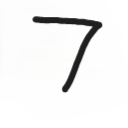

prediction
7 | 99.36773%
3 | 0.3771966%
9 | 0.10460329%


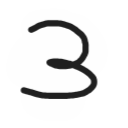

prediction
3 | 99.76084%
9 | 0.0915346%
7 | 0.07192936%


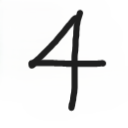

prediction
4 | 79.86333%
9 | 9.249437%
1 | 5.5744495%


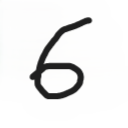

prediction
6 | 72.923515%
4 | 21.07379%
8 | 3.954423%


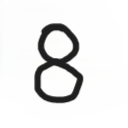

prediction
8 | 86.520386%
6 | 12.998221%
4 | 0.18572025%


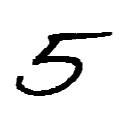

prediction
5 | 99.41165%
6 | 0.39484113%
9 | 0.15450789%


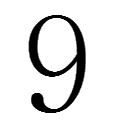

prediction
9 | 99.9975%
6 | 0.0009997234%
0 | 0.00054625026%


In [105]:
def display_image(image_path):
    image = Image.open(image_path)
    display(image)

def display_predictions():
    image_files = [os.path.join(data_to_predict_path, f) for f in os.listdir(data_to_predict_path) 
                       if os.path.isfile(os.path.join(data_to_predict_path, f))]
    image_features = [load_and_preprocess_image(image_file) for image_file in image_files]

    IMG_F = tf.transpose(tf.convert_to_tensor(image_features))
    hypotheses = H(IMG_F, show_logs=False).numpy() * 100

    for i in range(len(image_files)):
        display_image(image_files[i])
        predictions = hypotheses[:, i]
        k = 3
        top_k_idx =  np.argsort(predictions)[-k:][::-1]

        print("prediction")
        for idx in top_k_idx:
            print(classifications[idx] + " | " + str(predictions[idx]) + "%")
        
display_predictions()